# Text Modeling

## Amittai Siavava, Data Mining (Fall 2023)

In this assignment, we ask you to create a classifier for detecting spam. Please populate this Jupyter notebook with your code and embedded results (outputs, figures, etc) and submit it on Canvas as a zip file.  <B

Useful libraries for this assignment: <br>
(1) sklearn
(2) nltk
(3) gensim

In [1]:
# install libraries if nonexistent.

# %pip install sklearn
# %pip install nltk
# %pip install gensim
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install wordcloud
# %pip install IPython

import nltk
import gensim
import pandas as pd
import matplotlib as plt
import seaborn as sns
import wordcloud

import sklearn
import sklearn.ensemble
import sklearn.linear_model

"""
  I use these to display markdown from python code.
  
  If you get an import error, please run `pip install IPython`
  (or uncomment lines 3-10 above)
"""

from IPython.display import display, Markdown


## Q1 (76 points)
You have been provided a spam dataset (SPAM.csv). Each line in the dataset corresponds to one message and has a label of either "ham" or "spam". In this assignment, you are experimenting with different features and models to create the best spam detector possible.  

Load the data into a dataframe. Divide the data into a random train/test set with the ratio 85/15. Finally, use sklearn to run the following experiments.

In [2]:
# load csv file
df = pd.read_csv('SPAM.csv')
display(df.head(5))

# convert label to binary
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
display(df.head(5))

# split into train (85%) and test (15%) sets
train, test = sklearn.model_selection.train_test_split(df, test_size=0.15, random_state=42)

display(Markdown(
  f"""
  #### Dataset Stats
  - columns:    {list(df.columns)}
  - Total size: {len(df)}
  - Train size: {len(train)}
  - Test size:  {len(test)}
  """
))


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."



  #### Dataset Stats
  - columns:    ['Category', 'Message']
  - Total size: 5572
  - Train size: 4736
  - Test size:  836
  

### (A)[10 points] Train and evaluate the following models:


#### (A.1) Logistic Regression (LR)


  #### Model Stats
  - LOGISTIC REGRESSION ACCURACY: $0.9868421052631579$
  - LOGISTIC REGRESSION F1 SCORE: $0.986534874309315$
  - CONFUSION MATRIX:
  

<Axes: >

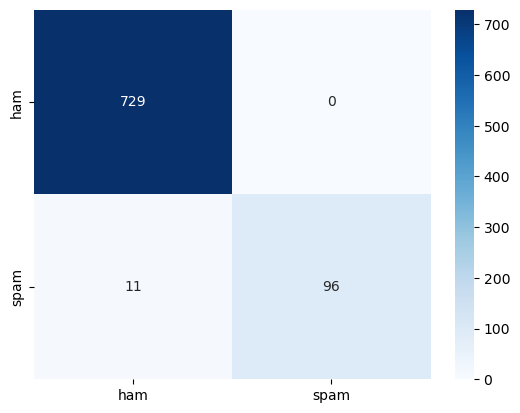

In [3]:
# initialize logistic regression model
model = sklearn.linear_model.LogisticRegression()

# initialize vectorizer
vectorizer = sklearn.feature_extraction.text.CountVectorizer()

# fit vectorizer to training data
vectorizer.fit(train['Message'])

# transform training and test data into vectors
train_vectors = vectorizer.transform(train['Message'])
test_vectors = vectorizer.transform(test['Message'])

# fit model to training data
model.fit(train_vectors, train['Category'])

# predict on test data
predictions_lr = model.predict(test_vectors)

# calculate accuracy
accuracy_lr = sklearn.metrics.accuracy_score(test['Category'], predictions_lr)
f1_lr = sklearn.metrics.f1_score(test['Category'], predictions_lr, average='weighted')
confusion_matrix_lr = pd.DataFrame(
    sklearn.metrics.confusion_matrix(test['Category'], predictions_lr),
    index=['ham', 'spam'],
    columns=['ham', 'spam']
  )


display(Markdown(
  f"""
  #### Model Stats
  - LOGISTIC REGRESSION ACCURACY: ${accuracy_lr}$
  - LOGISTIC REGRESSION F1 SCORE: ${f1_lr}$
  - CONFUSION MATRIX:
  """
))

display(sns.heatmap(confusion_matrix_lr, annot=True, fmt='d', cmap='Blues'))


#### (A.2) Random Forest (RF)


  #### Model Stats
  - RANDOM FOREST ACCURACY: 0.9796650717703349
  - RANDOM FOREST F1 SCORE: 0.9789048607220381
  - CONFUSION MATRIX:
  

<Axes: >

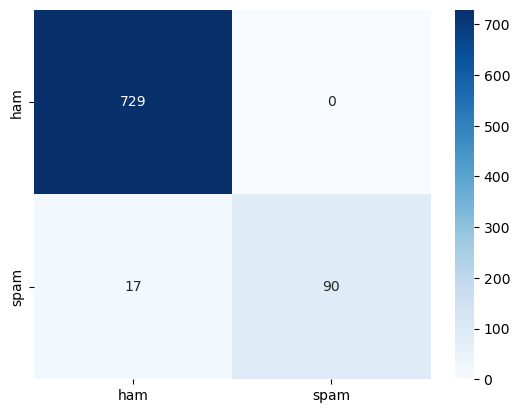

In [4]:
# initialzie random forest model
model = sklearn.ensemble.RandomForestClassifier()

# initialize vectorizer
vectorizer = sklearn.feature_extraction.text.CountVectorizer()

# fit vectorizer to training data
vectorizer.fit(train['Message'])

# transform training and test data into vectors
train_vectors = vectorizer.transform(train['Message'])
test_vectors = vectorizer.transform(test['Message'])

# fit model to training data
model.fit(train_vectors, train['Category'])

# predict on test data
predictions_rf = model.predict(test_vectors)

# calculate accuracy
accuracy_rf = sklearn.metrics.accuracy_score(test['Category'], predictions_rf)
f1_rf = sklearn.metrics.f1_score(test['Category'], predictions_rf, average='weighted')
confusion_matrix_rf = pd.DataFrame(
    sklearn.metrics.confusion_matrix(test['Category'], predictions_rf),
    index=['ham', 'spam'],
    columns=['ham', 'spam']
  )


display(Markdown(
  f"""
  #### Model Stats
  - RANDOM FOREST ACCURACY: {accuracy_rf}
  - RANDOM FOREST F1 SCORE: {f1_rf}
  - CONFUSION MATRIX:
  """
))

display(sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues'))



### (A)[10 points] Train and evaluate the following models

- (1) Logistic Regression (LR)
- (2) Random Forest (RF)

### (B)[24 points] and the combination of all following preprocessing (total of 8 combinations):

- (1) with and without lowercasing
- (2) with and without stopword removal
- (3) with and without lemmatization

### (C)[24 points] and the following lexical features (total of 6 combinations):

- (1) unigrams
- (2) unigrams and bigrams
- (3) unigrams, bigrams and trigrams
- (4) tfidf unigrams
- (5) tfidf  unigrams and bigrams
- (6) tfidf unigrams, bigrams and trigrams

So that's 2 model types x 8 possible prepreocessing x 6 possible features = 96 models

### (D)[10 points] Create a dataframe where each row is one of the models and 15 columns.

_The first 9 columns should be boolean and capture if the model used the following:_

- (1) lowercased: 1 / 0
- (2) stopwords_removed: 1 / 0
- (3) lemmatized: 1 / 0
- (4) unigrams : 1 / 0
- (5) bigrams :  1 / 0
- (6) trigrams :  1 / 0
- (7) tfidf unigrams :  1 / 0
- (8) tfidf bigrams :  1 / 0
- (9) tfidf trigrams :  1 / 0

_The last 6 columns should show the default f1 (default parameters), weighted f1, and accuracy of the models on the **train** and **test** sets_

- (10) `f1_train`
- (11) `weighted_f1_train`
- (12) `accuracy_train`
- (13) `f1_test`
- (14) `weighted_f1_test`
- (15) `accuracy_test`

> HINT 1: You should convert the "spam" category to 1 and the "ham" category to 0, sklearn models can only work with numbers.
>
> HINT 2: You should make the whole thing systematically using good coding convetion instead of copy and pasting the models!
> I have created a partial skeleton template for Q1 below to guide you with this.
> You do NOT have to use this. This is just for your benefit.
> I have not included templates for the other questions.


In [5]:
def preprocess(tokenized_text, *, lowercase=False, remove_stopwords=False,lemmatize=False):
    
    cleaned_tokenized_text = tokenized_text.copy()
    
    if lowercase:
        cleaned_tokenized_text = [token.lower() for token in tokenized_text]
        
    if remove_stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
        cleaned_tokenized_text = [token for token in tokenized_text if token not in stopwords]
        
    if lemmatize:
        lemmatizer = nltk.stem.WordNetLemmatizer()
        cleaned_tokenized_text = [lemmatizer.lemmatize(token) for token in tokenized_text]

    return cleaned_tokenized_text


In [6]:
def extract_features(cleaned_tokenized_text, *, tfidf=False, ngram_range=(1,1)):
    
    # initialize vectorizer
    # - by default, we use a count vectorizer
    # - if tfidf is true, we use a tfidf vectorizer
    if tfidf:
        vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range=ngram_range)
    else:
        vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=ngram_range)
        
    # fit the vactorizer
    vectorizer.fit(cleaned_tokenized_text)
    
    # transform the text into feature vectors
    features = vectorizer.transform(cleaned_tokenized_text)
    
    """
        NOTE: the above two can be done in one go with `fit_transform`,
        but I've split it up for clarity.
    """
    
    return features, vectorizer


In [7]:
def train_model(model_type, *, train_features, train_labels):
    
    # initialize model
    match model_type:
        case 'LR':
            model = sklearn.linear_model.LogisticRegression()
        case 'RF':
            model = sklearn.ensemble.RandomForestClassifier()
        case _:
            raise ValueError(f'Invalid model type: {model_type}')
    
    # fit model to training features and labels
    trained_model = model.fit(train_features, train_labels)
    
    return trained_model


In [8]:
def evaluate_model(trained_model, *, split="test", metric=None, eval_features, eval_labels):
    
    # predict on evaluation features
    predictions = trained_model.predict(eval_features)
    
    results = {}
    
    results[f"accuracy_{split}"] = sklearn.metrics.accuracy_score(eval_labels, predictions)
    
    results[f"weighted_f1_{split}"] = sklearn.metrics.f1_score(eval_labels, predictions, average='weighted')
    results[f"f1_{split}"] = sklearn.metrics.f1_score(eval_labels, predictions)
    
    return results


In [9]:
def process(results: pd.DataFrame, train_df, test_df, *, lowercase=False, remove_stopwords=False, lemmatize=False, ngram_range=(1,1), tfidf=False):
    # extract_features(cleaned_tokenized_text, *, tfidf=False, ngram_range=(1,1)):
    clean_tokenized_train = preprocess(train_df["Message"],lowercase=lowercase, remove_stopwords=remove_stopwords,lemmatize=lemmatize)
    clean_tokenized_test = preprocess(test_df["Message"], lowercase=lowercase, remove_stopwords=remove_stopwords,lemmatize=lemmatize)
    train_features, vectorizer = extract_features(clean_tokenized_train, tfidf=tfidf, ngram_range=ngram_range)
    test_features = vectorizer.transform(clean_tokenized_test)

    # train model
    for model_type in ('LR', 'RF'):
        # trained_lr = train_model('logistic_regression', train_features=train_features, train_labels=train['Category'])
        # trained_rf = train_model('random_forest', train_features=train_features, train_labels=train['Category'])
        model = train_model(model_type, train_features=train_features, train_labels=train['Category'])

        results.loc[len(results)] = {
            'model': model_type,
            'lowercased': lowercase,
            'stopwords_removed': remove_stopwords,
            'lemmatized': lemmatize,
            'unigrams': (not tfidf) and 1 in range(ngram_range[0], ngram_range[1]+1),
            'bigrams': (not tfidf) and 2 in range(ngram_range[0], ngram_range[1]+1),
            'trigrams': (not tfidf) and 3 in range(ngram_range[0], ngram_range[1]+1),
            'tfidf_unigrams': tfidf and 1 in range(ngram_range[0], ngram_range[1]+1),
            'tfidf_bigrams': tfidf and 2 in range(ngram_range[0], ngram_range[1]+1),
            'tfidf_trigrams': tfidf and 3 in range(ngram_range[0], ngram_range[1]+1),
            **evaluate_model(model, split="train", eval_features=train_features, eval_labels=train_df['Category']),
            **evaluate_model(model, split="test", eval_features=test_features, eval_labels=test_df['Category'])
        }


In [10]:
# initialzie dataframe
"""
### (D)[10 points] Create a dataframe where each row is one of the models and 15 columns.

_The first 9 columns should be boolean and capture if the model used the following:_

- (1) lowercased: 1 / 0
- (2) stopwords_removed: 1 / 0
- (3) lemmatized: 1 / 0
- (4) unigrams : 1 / 0
- (5) bigrams :  1 / 0
- (6) trigrams :  1 / 0
- (7) tfidf unigrams :  1 / 0
- (8) tfidf bigrams :  1 / 0
- (9) tfidf trigrams :  1 / 0

_The last 6 columns should show the default f1 (default parameters), weighted f1, and accuracy of the models on the **train** and **test** sets_

- (10) `f1_train`
- (11) `weighted_f1_train`
- (12) `accuracy_train`
- (13) `f1_test`
- (14) `weighted_f1_test`
- (15) `accuracy_test`
"""

results = pd.DataFrame(columns=[
    'model',
    'lowercased',
    'stopwords_removed',
    'lemmatized',
    'unigrams',
    'bigrams',
    'trigrams',
    'tfidf_unigrams',
    'tfidf_bigrams',
    'tfidf_trigrams',
    'f1_train',
    'weighted_f1_train',
    'accuracy_train',
    'f1_test',
    'weighted_f1_test',
    'accuracy_test'
])

results.head()


,model,lowercased,stopwords_removed,lemmatized,unigrams,bigrams,trigrams,tfidf_unigrams,tfidf_bigrams,tfidf_trigrams,f1_train,weighted_f1_train,accuracy_train,f1_test,weighted_f1_test,accuracy_test


In [11]:
# try all combinations of preprocessing and vectorization
count = 1
for lowercase in (True, False):
  for remove_stopwords in (True, False):
    for lemmatize in (True, False):
      for ngram_range in ((1,1), (1,2), (1,3)):
        for tfidf in (True, False):
          if count % 16 == 0:
            print(f'Processed {count} combinations')
          count += 2
          process(results, train, test, lowercase=lowercase, remove_stopwords=remove_stopwords, lemmatize=lemmatize, ngram_range=ngram_range, tfidf=tfidf)

results.head()


,model,lowercased,stopwords_removed,lemmatized,unigrams,bigrams,trigrams,tfidf_unigrams,tfidf_bigrams,tfidf_trigrams,f1_train,weighted_f1_train,accuracy_train,f1_test,weighted_f1_test,accuracy_test
0,LR,True,True,True,False,False,False,True,False,False,0.900855,0.974518,0.975507,0.885417,0.972372,0.973684
1,RF,True,True,True,False,False,False,True,False,False,1.000000,1.000000,1.000000,0.919192,0.980192,0.980861
2,LR,True,True,True,True,False,False,False,False,False,0.992126,0.997881,0.997889,0.945813,0.986535,0.986842
3,RF,True,True,True,True,False,False,False,False,False,1.000000,1.000000,1.000000,0.891192,0.973692,0.974880
4,LR,True,True,True,False,False,False,True,True,False,0.850987,0.962686,0.964949,0.836957,0.961551,0.964115


In [12]:
results


,model,lowercased,stopwords_removed,lemmatized,unigrams,bigrams,trigrams,tfidf_unigrams,tfidf_bigrams,tfidf_trigrams,f1_train,weighted_f1_train,accuracy_train,f1_test,weighted_f1_test,accuracy_test
0,LR,True,True,True,False,False,False,True,False,False,0.900855,0.974518,0.975507,0.885417,0.972372,0.973684
1,RF,True,True,True,False,False,False,True,False,False,1.000000,1.000000,1.000000,0.919192,0.980192,0.980861
2,LR,True,True,True,True,False,False,False,False,False,0.992126,0.997881,0.997889,0.945813,0.986535,0.986842
3,RF,True,True,True,True,False,False,False,False,False,1.000000,1.000000,1.000000,0.891192,0.973692,0.974880
4,LR,True,True,True,False,False,False,True,True,False,0.850987,0.962686,0.964949,0.836957,0.961551,0.964115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,RF,False,False,False,True,True,False,False,False,False,1.000000,1.000000,1.000000,0.885417,0.972372,0.973684
92,LR,False,False,False,False,False,False,True,True,True,0.790170,0.948826,0.953125,0.817680,0.957365,0.960526
93,RF,False,False,False,False,False,False,True,True,True,1.000000,1.000000,1.000000,0.849462,0.964302,0.966507
94,LR,False,False,False,True,True,True,False,False,False,0.996865,0.999154,0.999155,0.919192,0.980192,0.980861


### (E)[4 points]

Which model has the best weighted f1 according to the train set?

Which model has the best weighted f1 according to the test set?

### (F)[4 points]

Show the confusion matrix for the best-performing model on the test set.
Explain what each element of the matrix means.


In [18]:
# best weighted f1 per train set
best_f1_train = results.sort_values(by='weighted_f1_train', ascending=False).iloc[0]
display(Markdown(
  f"""
  #### Best Weighted F1 Model (Train)
  - Model: {best_f1_train['model']}
  - Lowercased: {best_f1_train['lowercased']}
  - Stopwords Removed: {best_f1_train['stopwords_removed']}
  - Lemmatized: {best_f1_train['lemmatized']}
  - Unigrams: {best_f1_train['unigrams']}
  - Bigrams: {best_f1_train['bigrams']}
  - Trigrams: {best_f1_train['trigrams']}
  - TFIDF Unigrams: {best_f1_train['tfidf_unigrams']}
  - TFIDF Bigrams: {best_f1_train['tfidf_bigrams']}
  - TFIDF Trigrams: {best_f1_train['tfidf_trigrams']}
  - Weighted F1 (Train): {best_f1_train['weighted_f1_train']}
  - Weighted F1 (Test): {best_f1_train['weighted_f1_test']}
  """
))

best_f1_test = results.sort_values(by='weighted_f1_test', ascending=False).iloc[0]
display(Markdown(
  f"""
  #### Best Weighted F1 Model (Test)
  - Model: {best_f1_test['model']}
  - Lowercased: {best_f1_test['lowercased']}
  - Stopwords Removed: {best_f1_test['stopwords_removed']}
  - Lemmatized: {best_f1_test['lemmatized']}
  - Unigrams: {best_f1_test['unigrams']}
  - Bigrams: {best_f1_test['bigrams']}
  - Trigrams: {best_f1_test['trigrams']}
  - TFIDF Unigrams: {best_f1_test['tfidf_unigrams']}
  - TFIDF Bigrams: {best_f1_test['tfidf_bigrams']}
  - TFIDF Trigrams: {best_f1_test['tfidf_trigrams']}
  - Weighted F1 (Train): {best_f1_test['weighted_f1_train']}
  - Weighted F1 (Test): {best_f1_test['weighted_f1_test']}
  """
))



  #### Best Weighted F1 Model (Train)
  - Model: RF
  - Lowercased: False
  - Stopwords Removed: False
  - Lemmatized: False
  - Unigrams: True
  - Bigrams: True
  - Trigrams: True
  - TFIDF Unigrams: False
  - TFIDF Bigrams: False
  - TFIDF Trigrams: False
  - Weighted F1 (Train): 1.0
  - Weighted F1 (Test): 0.9587684657271375
  


  #### Best Weighted F1 Model (Test)
  - Model: LR
  - Lowercased: True
  - Stopwords Removed: False
  - Lemmatized: True
  - Unigrams: True
  - Bigrams: False
  - Trigrams: False
  - TFIDF Unigrams: False
  - TFIDF Bigrams: False
  - TFIDF Trigrams: False
  - Weighted F1 (Train): 0.9978814877524047
  - Weighted F1 (Test): 0.986534874309315
  

In [20]:
# confusion matrix for best model on test set
# recreate model with best params
# model = train_model(best_f1_test['model'], train_features=train_features, train_labels=train['Category'])

# recreate params
lowercase = best_f1_test['lowercased']
remove_stopwords = best_f1_test['stopwords_removed']
lemmatize = best_f1_test['lemmatized']
tf_idf = any([best_f1_test['tfidf_unigrams'], best_f1_test['tfidf_bigrams'], best_f1_test['tfidf_trigrams']])
if not tf_idf:
  ngram_range = (1, 3 if best_f1_test['trigrams'] else 2 if best_f1_test['bigrams'] else 1)
else:
  ngram_range = (1, 3 if best_f1_test['tfidf_trigrams'] else 2 if best_f1_test['tfidf_bigrams'] else 1)

# preprocess data
clean_tokenized_train = preprocess(train["Message"],lowercase=lowercase, remove_stopwords=remove_stopwords,lemmatize=lemmatize)
clean_tokenized_test = preprocess(test["Message"], lowercase=lowercase, remove_stopwords=remove_stopwords,lemmatize=lemmatize)

# extract features
train_features, vectorizer = extract_features(clean_tokenized_train, tfidf=tf_idf, ngram_range=ngram_range)
test_features = vectorizer.transform(clean_tokenized_test)

# train model
best_f1_test_model = train_model(best_f1_test['model'], train_features=train_features, train_labels=train['Category'])

# predict on test data
predictions = best_f1_test_model.predict(test_features)

# compute confusion matrix
confusion_matrix = pd.DataFrame(
    sklearn.metrics.confusion_matrix(test['Category'], predictions),
    index=['ham', 'spam'],
    columns=['ham', 'spam']
  )

display(Markdown(
  f"""
  #### Confusion Matrix
  
  - Model: {best_f1_test['model']}
  - True Positives: {confusion_matrix['spam']['spam']} -- correctly identified spam
  - True Negatives: {confusion_matrix['ham']['ham']} -- correctly identified ham
  - False Positives: {confusion_matrix['ham']['spam']} -- incorrectly identified spam
  - False Negatives: {confusion_matrix['spam']['ham']} -- incorrectly identified ham
  """
))




  #### Confusion Matrix
  
  - Model: LR
  - True Positives: 96 -- correctly identified spam
  - True Negatives: 729 -- correctly identified ham
  - False Positives: 11 -- incorrectly identified spam
  - False Negatives: 0 -- incorrectly identified ham
  

### Q2 (56 points)
**(A)[40 points]** Repeat the experiment for the best-performing combination of model type, preprocessing, and lexical features above, but this time limit the analysis to all the combinations of the parts-of-speeches below (total of 8 combinations):<br>

(1) Adjectives <br>
(2) Nouns  <br>
(3) Verbs  <br>

What this means is that after tokenization and before preprocessing, you remove all words that do not have the part of speech you are looking at. E.g., for the combination Adjectives & Nouns, all words that are not a noun or adjective should be removed. <br>

So that's 8 new models. <br>

**(B)[10 points]** Create a new dataframe where each row is one of the models. The dataframe should have 3 boolean columns capturing which parts-of-speech were used: <br>

(1) adjectives : 1 / 0 <br>
(2) nouns : 1 / 0 <br>
(3) verbs : 1 / 0 <br>
 
and 3 columns showing the default f1 (default parameters), weighted f1, and accuracy of the models on the **test** set only: <br>

(4) f1_test <br>
(5) weighted_f1_test <br>
(6) accuracy_test <br>

**(C)[6 points]** <br>
Which model has the best weighted f1 according to the test set? <br>
Show the confusion matrix for the best-performing model on the test set. <br>

In [27]:
#Your code here. Feel free to make as many cells as needed

# best model
best_model = best_f1_test_model

# best vectorizer
best_vectorizer = vectorizer

# new df with only adjectives, nouns, verbs, and 
results_2 = pd.DataFrame(columns=[
  'adjectives',
  'nouns',
  'verbs',
  'f1_test',
  'weighted_f1_test',
  'accuracy_test'
])

for adjectives in (True, False):
  for nouns in (True, False):
    for verbs in (True, False):
      
      # limit to adjectives, nouns, and verbs if applicable
      if adjectives or nouns or verbs:
        pos_tags = nltk.pos_tag(best_vectorizer.get_feature_names_out())
        pos_tags = [tag[1] for tag in pos_tags]
        train_features_2 = train_features[:, [i for i, tag in enumerate(pos_tags) if (adjectives and tag.startswith('JJ')) or (nouns and tag.startswith('NN')) or (verbs and tag.startswith('VB'))]]
        test_features_2 = test_features[:, [i for i, tag in enumerate(pos_tags) if (adjectives and tag.startswith('JJ')) or (nouns and tag.startswith('NN')) or (verbs and tag.startswith('VB'))]]
        
      else:
        train_features_2 = train_features
        test_features_2 = test_features
        
      # train model
      best_model_2 = train_model(best_f1_test['model'], train_features=train_features_2, train_labels=train['Category'])
      
      # predict on test data
      predictions = best_model_2.predict(test_features_2)
      
      # evaluate model and add to df
      results_2.loc[len(results_2)] = {
        'adjectives': adjectives,
        'nouns': nouns,
        'verbs': verbs,
        **evaluate_model(best_model_2, split="test", eval_features=test_features_2, eval_labels=test['Category'])
      }
      
results_2


,adjectives,nouns,verbs,f1_test,weighted_f1_test,accuracy_test
0,True,True,True,0.940594,0.985278,0.985646
1,True,True,False,0.909091,0.977716,0.978469
2,True,False,True,0.876289,0.970006,0.971292
3,True,False,False,0.773481,0.947029,0.950957
4,False,True,True,0.909091,0.977716,0.978469
5,False,True,False,0.885417,0.972372,0.973684
6,False,False,True,0.711864,0.933374,0.938995
7,False,False,False,0.945813,0.986535,0.986842


In [29]:
best_f1_test = results_2.sort_values(by='weighted_f1_test', ascending=False).iloc[0]
display(Markdown(
  f"""
  #### Best Weighted F1 Model (Test)
  - Adjectives: {best_f1_test['adjectives']}
  - Nouns: {best_f1_test['nouns']}
  - Verbs: {best_f1_test['verbs']}
  - Weighted F1 (Test): {best_f1_test['weighted_f1_test']}
  """
))



  #### Best Weighted F1 Model (Test)
  - Adjectives: False
  - Nouns: False
  - Verbs: False
  - Weighted F1 (Test): 0.986534874309315
  

### Q3 (68 points)

**(A)[32 points]** Repeat the experiment for the best-performing model type from Q1 (i.e., LR or RF) using the following features (no preprocessing is required): <br>
(1) Word2Vec features from GoogleNews (limit vocabulary to 40000 words) <br>
(2) Features from a new Word2Vec model trained on the **train** set of your dataset. Use the following hyperparameters: window=5,vector_size=100 ,min_count=5 <br>

You can average the semantic embeddings for the words in a document to create a single semantic vector for the document. You can ignore words that are not present in your Word2Vec model. <br>

**(B)[10 points]** Use weighted f1 on the test set to pick the best semantic features from the two options above and combine them with the best-performing features from Q2 to train a new model. <br>

**(C)[20 points]** Finally, create a new dataframe where each row is one of the following models: <br>
(1) Best-performing model using lexical features only (Q1).  <br>
(2) Best-performing model using lexical features on different parts-of-speech (Q2).  <br>
(3) Best-performing model from using semantic features only (Q3-A).  <br>
(4) The final model from Q3-B that combines the best semantic and lexical features.  <br>

<br>
The dataframe should have boolean columns capturing which (if any) preprocessing techniques were used: <br>
<br>

(1) lowercased: 1 / 0 <br>
(2) stopwords_removed: 1 / 0 <br>
(3) lemmatized: 1 / 0 <br>

<br>
which (if any) parts-of-speech were used: <br>
<br>

(4) adjectives : 1 / 0 <br>
(5) nouns : 1 / 0 <br>
(6) verbs : 1 / 0 <br>
(7) all: 1 / 0  (this is for the best-performing Q1 model that uses all parts-of-speech)<br>


<br>
which (if any) lexical features were used: <br>
<br>

(8) unigrams : 1 / 0 <br>
(9) bigrams :  1 / 0 <br>
(10) trigrams :  1 / 0 <br>
(11) tfidf unigrams :  1 / 0 <br>
(12) tfidf bigrams :  1 / 0 <br>
(13) tfidf trigrams :  1 / 0 <br>


<br>
which (if any) semantic features were used: <br>
<br>

(14) w2v_GoogleNews : 1 / 0 <br>
(15) w2v_Span=m : 1 / 0 <br>

 
and 3 columns showing the default f1 (default parameters), weighted f1, and accuracy of the four models on the **test** set only: <br>

(16) f1_test <br>
(17) weighted_f1_test <br>
(18) accuracy_test <br>

**(D)[6 points]**
Which model has the best weighted f1 according to the test set? <br> 
Show the confusion matrix for the best-performing model on the test set. <br>

In [78]:
import gensim.downloader

def word_2_vec(df: pd.DataFrame, *, new="False"):
  if not new:
    # load pretrained model
    model = gensim.downloader.load('word2vec-google-news-300')
    
    # limit vocabulary to 40000 words
    # model = gensim.models.KeyedVectors.load_word2vec_format('word2vec-google-news-300', binary=True, limit=40000)
  else:
    # create new w2v model and fit on train data. limit vocabulary to 40000 words
    print(f"{len(df['Message'].to_list())}")
    sentences = df["Message"].to_list()
    split_sentences = list(map(lambda x: x.split(), sentences))
    model = gensim.models.Word2Vec(sentences=split_sentences, window=5, vector_size=100, min_count=5)
    model = model.wv
    
  return model

wv = word_2_vec(train, new=False)    
# print vocabulary
# print(wv.vocab)
wv.most_similar(positive=["bad"], topn=5)


[('good', 0.7190051078796387),
 ('terrible', 0.6828611493110657),
 ('horrible', 0.6702598333358765),
 ('Bad', 0.669891893863678),
 ('lousy', 0.6647640466690063)]

In [79]:
import numpy as np
# average semantic embeddings for all words in each message
def avg_semantic_embedding(df: pd.DataFrame, *, wv):
  sentences = df["Message"].to_list()
  split_sentences = list(map(lambda x: x.split(), sentences))
  avg_embeddings = []
  for sentence in split_sentences:
    avg_embedding = np.zeros(wv.vector_size)
    for word in sentence:
      if word in wv:
        avg_embedding += wv[word]
    avg_embedding /= len(sentence)
    avg_embeddings.append(avg_embedding)
  return avg_embeddings


In [80]:
google_wv = word_2_vec(train, new=False)
new_wv = word_2_vec(train, new=True)

train_embeddings_google = avg_semantic_embedding(train, wv=google_wv)
train_embeddings_new = avg_semantic_embedding(train, wv=new_wv)

test_embeddings_google = avg_semantic_embedding(test, wv=google_wv)
test_embeddings_new = avg_semantic_embedding(test, wv=new_wv)

print(len(train_embeddings_google))
print(len(test_embeddings_new))


4736
4736
836


In [81]:
# train LR model
model_google = train_model('LR', train_features=train_embeddings_google, train_labels=train['Category'])
model_new = train_model('LR', train_features=train_embeddings_new, train_labels=train['Category'])

# predict on test data
predictions_google = model_google.predict(test_embeddings_google)
predictions_new = model_new.predict(test_embeddings_new)

# evaluate models
results_google = evaluate_model(model_google, split="test", eval_features=test_embeddings_google, eval_labels=test['Category'])
results_new = evaluate_model(model_new, split="test", eval_features=test_embeddings_new, eval_labels=test['Category'])

print(results_google)
print(results_new)


{'accuracy_test': 0.9401913875598086, 'weighted_f1_test': 0.9355757276986524, 'f1_test': 0.7252747252747253}
{'accuracy_test': 0.8720095693779905, 'weighted_f1_test': 0.8123897457847349, 'f1_test': 0.0}


### BONUS (5 to 50 points)

Find a combination of preprocessing, features, and models that outperforms the best model above (using weighted f1 as the metric). Your bonus points is based on how well you rank in the class. We will use the curve below to distribute the bonus points. I.e., the top 5% of the class will receive 50 bonus points and the bottom 5% will receive 5 bonus points.

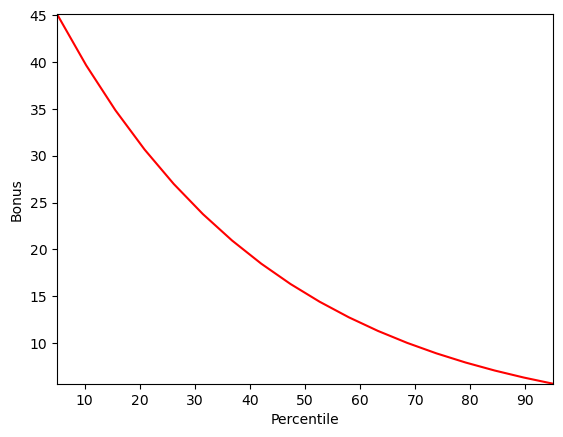

In [15]:
#This is just to show you the bonus curve. This is NOT part of the question.
import numpy as np
import sys
import matplotlib.pyplot as plt

a = 50
b = 0.025
c = 1 
x = np.linspace(5, 95, 18, endpoint = True)
y = (a * np.exp(-b*x)) + c

#print(list(zip(x,y)))
plt.plot(x, y, '-r')

axes = plt.gca()
axes.set_xlim([x.min(), x.max()])
axes.set_ylim([y.min(), y.max()])

plt.xlabel('Percentile')
plt.ylabel('Bonus')

plt.show()

while False: #set this to True to see your bonus points based on your hypothetical percentile
    try:
        x_in=float(input('percentile:'))
        bonus_out=np.round((a * np.exp(-b*x_in)) + c)
        print('At {:0.0f} percentile, you will get {:0.1f} bonus points'.format(x_in,bonus_out))
    except:
        print("Exiting")
        sys.exit(1)


In [16]:
#Your code here. Feel free to make as many cells as needed
